# Fashion MNIST Classification with CNNs
This notebook demonstrates the process of building, training, and evaluating a Convolutional Neural Network (CNN) on the Fashion MNIST dataset. The goal is to classify grayscale images of clothing into one of 10 categories. The workflow includes data exploration, preprocessing, model building, training, evaluation, and saving the trained model.

**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## About the Fashion MNIST Dataset
Fashion MNIST consists of 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28x28 pixels).
In this section, we will load the dataset and prepare it for exploration and modeling.

In [3]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Processing
Let's explore the dataset by visualizing some images and checking the distribution of classes.

In [5]:
print("Type of train_images:", type(train_images))
print("Type of train_labels:", type(train_labels))
print("Length of train_images:", len(train_images))
print("Length of train_labels:", len(train_labels))
print("Length of test_images:", len(test_images))
print("Shape of the first training image:", train_images[0].shape)
print("Type of the first training image:", type(train_images[0]))

Type of train_images: <class 'numpy.ndarray'>
Type of train_labels: <class 'numpy.ndarray'>
Length of train_images: 60000
Length of train_labels: 60000
Length of test_images: 10000
Shape of the first training image: (28, 28)
Type of the first training image: <class 'numpy.ndarray'>


In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

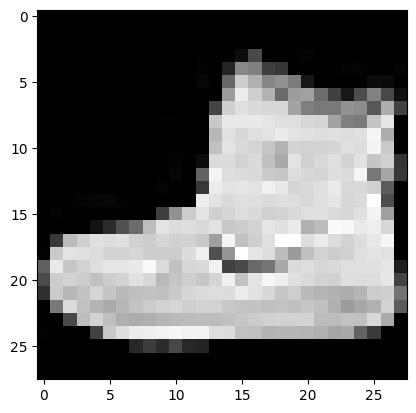

In [9]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [10]:
print(train_labels[0])

9


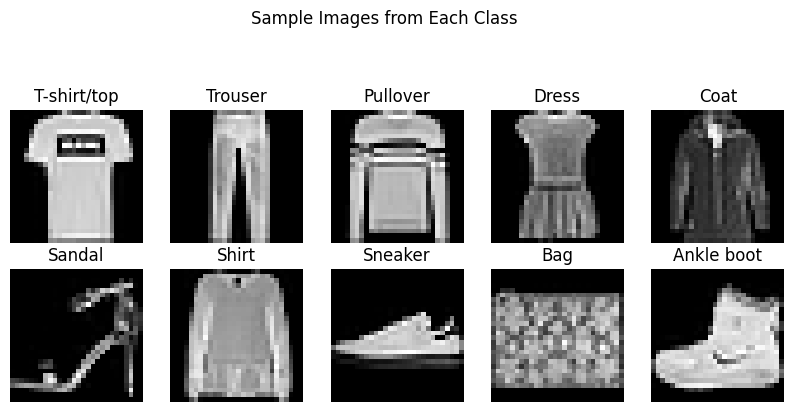

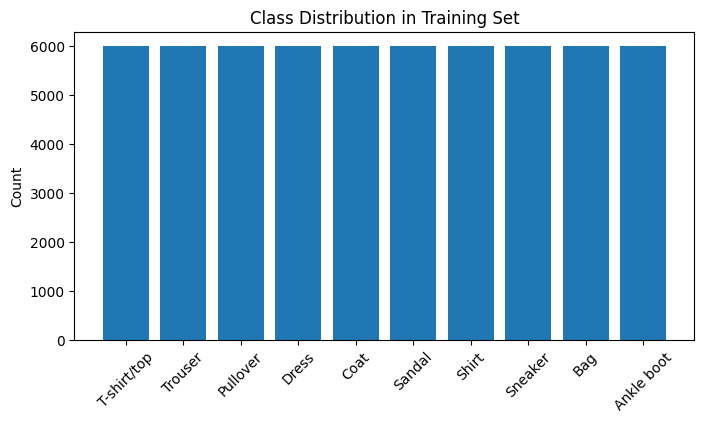

In [13]:
# Class names for Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Show one sample image from each class
plt.figure(figsize=(10, 10))
for i in range(10):
    # Get the first image of this class
    idx = np.where(train_labels == i)[0][0]
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[idx], cmap="gray")
    plt.title(class_names[i])
    plt.axis("off")

plt.suptitle("Sample Images from Each Class")
plt.show()

# Show class distribution in the training set
label_counts = collections.Counter(train_labels)
plt.figure(figsize=(8, 4))
plt.bar(class_names, [label_counts[i] for i in range(10)])
plt.title("Class Distribution in Training Set")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [15]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
# Check for missing or corrupted data
print('Any NaNs in train_images:', np.isnan(train_images).any())
print('Any NaNs in test_images:', np.isnan(test_images).any())
print('Any NaNs in train_labels:', np.isnan(train_labels).any())
print('Any NaNs in test_labels:', np.isnan(test_labels).any())

Any NaNs in train_images: False
Any NaNs in test_images: False
Any NaNs in train_labels: False
Any NaNs in test_labels: False


In [17]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [18]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [20]:
# Data Augmentation (improves generalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
    )
datagen.fit(train_images)

In [21]:
train_images.shape

(60000, 28, 28, 1)

In [22]:
test_images.shape

(10000, 28, 28, 1)

**Convolutional Neural Network**

In [23]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

**Model Training**

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Use data augmentation for training
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - accuracy: 0.5567 - loss: 1.2068 - val_accuracy: 0.7647 - val_loss: 0.6061
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7537 - loss: 0.6567 - val_accuracy: 0.8122 - val_loss: 0.4831
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7851 - loss: 0.5784 - val_accuracy: 0.8353 - val_loss: 0.4391
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8047 - loss: 0.5295 - val_accuracy: 0.8531 - val_loss: 0.4007
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8155 - loss: 0.4926 - val_accuracy: 0.8487 - val_loss: 0.3936
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8289 - loss: 0.4673 - val_accuracy: 0.8608 - val_loss: 0.3580
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8349 - loss: 0.4529 - val_accuracy: 0.8723 - val_loss: 0.3388
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8451 - loss: 0.4276 - val_accurac

**Model Evaluation**

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8914 - loss: 0.2944

Test accuracy: 0.8913999795913696


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


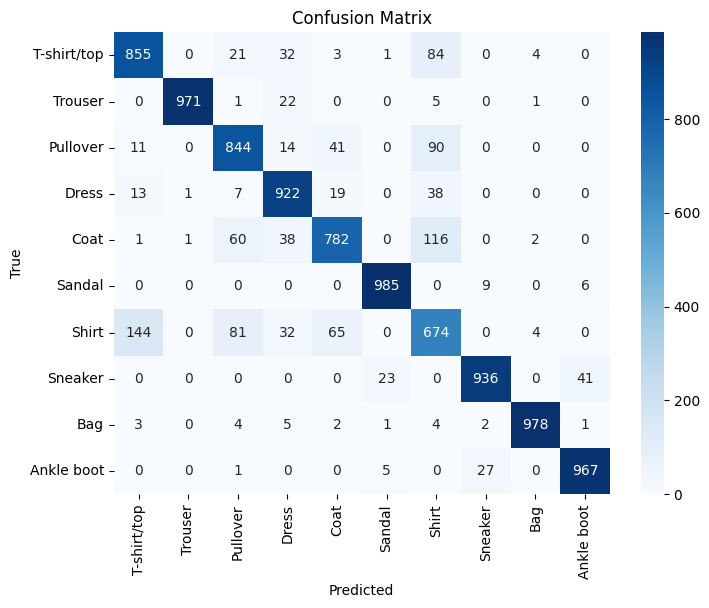

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.84      0.84      1000
       Dress       0.87      0.92      0.89      1000
        Coat       0.86      0.78      0.82      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.67      0.67      0.67      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict labels for test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(test_labels, y_pred_classes, target_names=class_names))

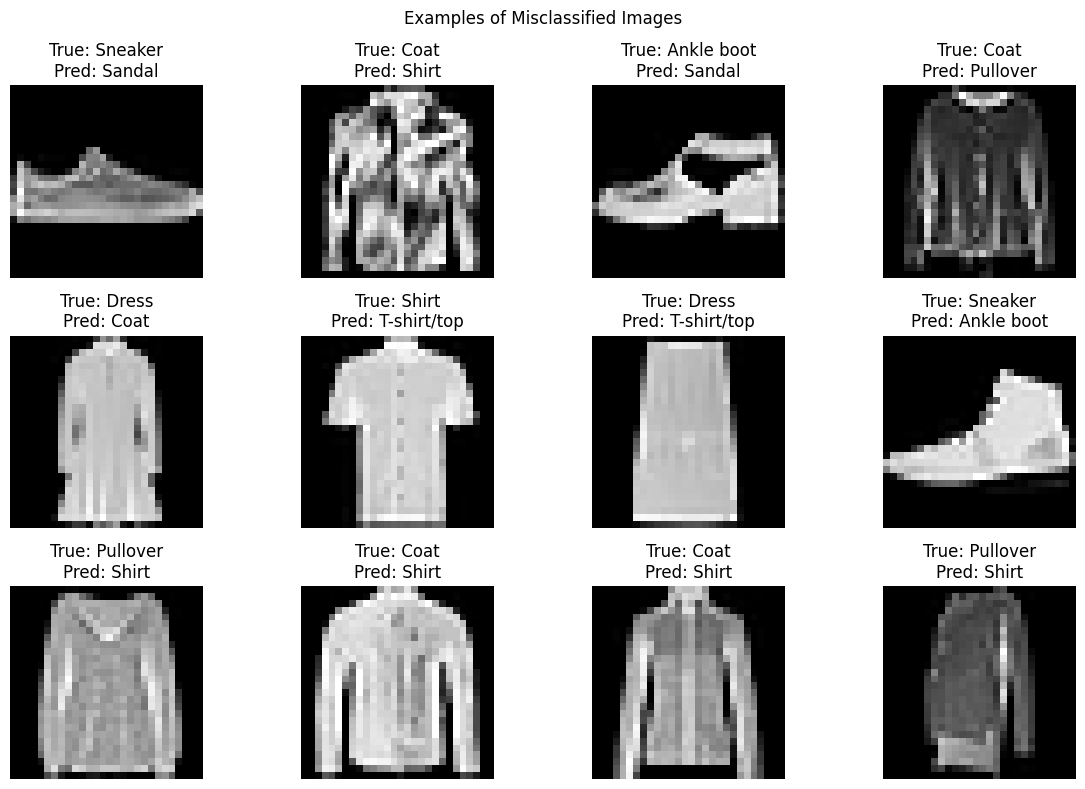

In [28]:
# Display some misclassified images
misclassified_idx = np.where(y_pred_classes != test_labels)[0]
plt.figure(figsize=(12,8))
for i, idx in enumerate(misclassified_idx[:12]):
    plt.subplot(3,4,i+1)
    plt.imshow(test_images[idx].reshape(28,28), cmap='gray')
    plt.title(f'True: {class_names[test_labels[idx]]}\nPred: {class_names[y_pred_classes[idx]]}')
    plt.axis('off')
plt.suptitle('Examples of Misclassified Images')
plt.tight_layout()
plt.show()

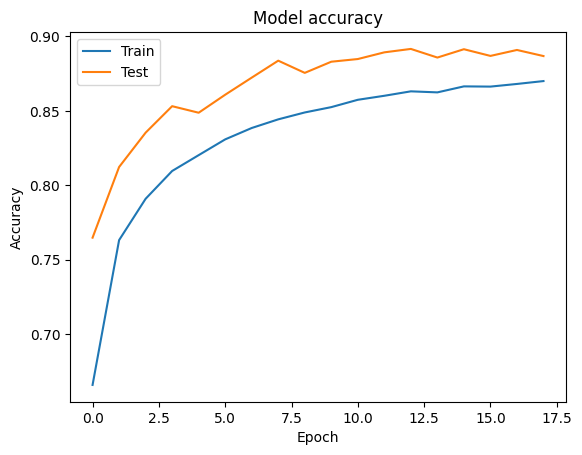

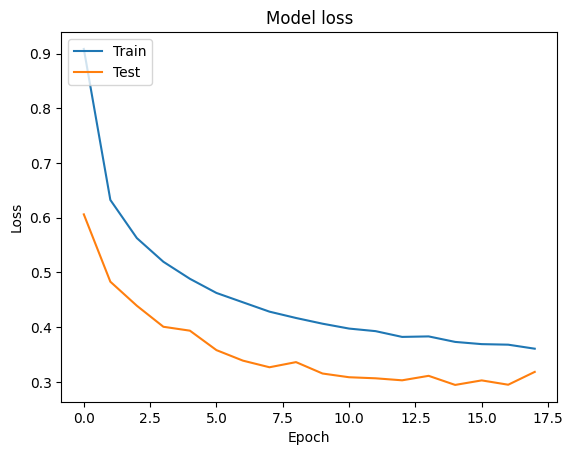

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
# Export model in SavedModel format
model.export('fashion_mnist_saved_model')

Saved artifact at 'fashion_mnist_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136939283564880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283566032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283563920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283563536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283568336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283569104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283567184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283567376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283569872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136939283570448: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [41]:
# Save the model in HDF5 format
model.save('fashion_mnist_model.h5')


In [42]:
# Path to your saved model
model_path = 'fashion_mnist_model.h5'

# Get the file size in KB
size_kb = os.path.getsize(model_path) / 1024
print(f'Model size: {size_kb:.2f} KB')

# Or in MB
size_mb = os.path.getsize(model_path) / (1024 * 1024)
print(f'Model size: {size_mb:.2f} MB')

Model size: 377.50 KB
Model size: 0.37 MB


## Model Quantization for Size Reduction (Here no needed)
To reduce the model size and make it more suitable for deployment on edge devices, we will apply post-training quantization using TensorFlow Lite.

In [37]:
import tensorflow as tf

# Create a Keras layer from the exported SavedModel
model_layer = tf.keras.layers.TFSMLayer(
    'fashion_mnist_saved_model',
    call_endpoint='serve'  # use the endpoint from your export
)

# Wrap it in a Keras model for TFLite conversion
inputs = tf.keras.Input(shape=(28, 28, 1))
outputs = model_layer(inputs)
model = tf.keras.Model(inputs, outputs)

# Convert to TensorFlow Lite with post-training quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Save the quantized TFLite model directly in the current folder
tflite_model_path = 'fashion_mnist_model_quantized.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_quant_model)

print(f'Quantized model saved at: {tflite_model_path}')


Saved artifact at '/tmp/tmp1dh9k08i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_56')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136938593197264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593197456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593197648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593197840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593198032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593198224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593198608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593198800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593198992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136938593199184: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized mode